# Analyzing temperatures in European countries

First of all, we have to import all required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')

Let's load a weather data.
Dataset was downloaded from: https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data

In [2]:
source_temperatures = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

Checking the data content:

In [3]:
source_temperatures.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [4]:
source_temperatures.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe
577461,2013-09-01,NaN,NaN,Zimbabwe


Let's convert column with dates to datetime format:

In [5]:
source_temperatures['dt'] = pd.to_datetime(source_temperatures['dt'])

Dropping unused for this analyze column:

In [6]:
temperatures = source_temperatures.drop(['AverageTemperatureUncertainty'], axis='columns')
temperatures.head()

,dt,AverageTemperature,Country
0,1743-11-01,4.384,Åland
1,1743-12-01,NaN,Åland
2,1744-01-01,NaN,Åland
3,1744-02-01,NaN,Åland
4,1744-03-01,NaN,Åland


Since the report should contain only common European countries, we should exclude the others.

In [23]:
countries = ['Iceland', 'Ireland', 'Germany', 'Czech Republic', 'Belarus', 'Ukraine', 'France', 'Spain', 'Italy', 'Greece']
temperatures = temperatures[temperatures.Country.isin(countries)]

### Step 1. Comparing the temperatures in different centuries

Defining a filters that divide dataset in two centuries:

In [8]:
current_century_filter = temperatures['dt'].map(lambda x: x.year >= 2000)
previous_century_filter = temperatures['dt'].map(lambda x: x.year < 2000)

Defining a seasons filters:

In [9]:
winter_filter = temperatures['dt'].map(lambda x: x.month in [12, 1, 2])
summer_filter = temperatures['dt'].map(lambda x: x.month in [6, 7, 8])

Defining an aggregator function that calculates math mean of temperatures:

In [10]:
def aggregate(dataframe):
    return dataframe.groupby(['Country']).agg({
        'AverageTemperature': 'mean',
    })

Let's create current and previous centuries dataframes:

In [11]:
current_temperatures = aggregate(temperatures[current_century_filter])
previous_temperatures = aggregate(temperatures[previous_century_filter])

Printing out a mean temperatures by country in each century:

In [12]:
mean_temperatures = pd.merge(
    current_temperatures[['AverageTemperature']],
    previous_temperatures[['AverageTemperature']],
    on='Country'
)
mean_temperatures = mean_temperatures.rename(index=str, columns={
    'AverageTemperature_x': 'current_century', 'AverageTemperature_y': 'previous_century',
}).sort_values(by=['current_century'])
mean_temperatures

,current_century,previous_century
Country,,
Iceland,2.564378,1.341732
Belarus,7.355280,5.735376
Czech Republic,8.910226,7.555863
Ukraine,9.214256,7.568243
Germany,9.390854,8.084844
Ireland,10.259549,9.373670
France,13.853445,12.713390
Italy,13.881537,12.674602
Spain,14.636159,13.556930


Put the results above to the plot:

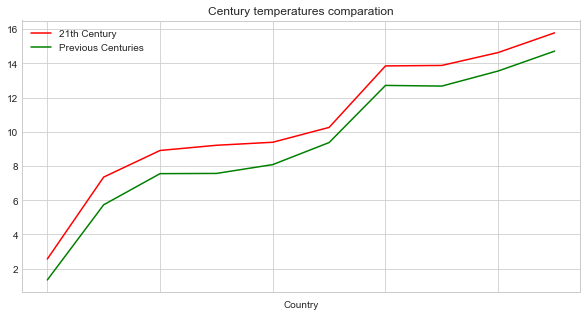

In [13]:
plot = mean_temperatures.plot(
    kind='line',
    y=['current_century', 'previous_century'],
    color=['red', 'green'],
    title='Century temperatures comparation',
    figsize=(10, 5)
)
plt.legend(['21th Century', 'Previous Centuries']);
plt.show()

As we can see, the temperatures in 21th century are higher than in previous centuries. That means that the global warming is no longer a prognostication, but a present condition.

### Step 2. Comparing the temperatures in different seasons

Defining a season filters:

In [14]:
winter_filter = temperatures['dt'].map(lambda x: x.month in [12, 1, 2])
summer_filter = temperatures['dt'].map(lambda x: x.month in [6, 7, 8])

In [15]:
current_winter_temperatures = aggregate(temperatures[current_century_filter & winter_filter])
previous_winter_temperatures = aggregate(temperatures[previous_century_filter & winter_filter])

current_summer_temperatures = aggregate(temperatures[current_century_filter & summer_filter])
previous_summer_temperatures = aggregate(temperatures[previous_century_filter & summer_filter])

#### Winter in European countries:

In [16]:
winter_temperatures = pd.merge(
    current_winter_temperatures[['AverageTemperature']],
    previous_winter_temperatures[['AverageTemperature']],
    on='Country'
)
winter_temperatures = winter_temperatures.rename(index=str, columns={
    'AverageTemperature_x': 'current_century', 'AverageTemperature_y': 'previous_century',
}).sort_values(by=['current_century'])
winter_temperatures

,current_century,previous_century
Country,,
Belarus,-4.066366,-5.742690
Ukraine,-2.724244,-4.381302
Iceland,-1.884122,-3.487409
Czech Republic,-0.770756,-1.986257
Germany,0.834073,-0.399901
Italy,5.536854,4.798441
Ireland,5.904805,5.140567
Greece,6.975585,6.348711
Spain,7.077537,6.398923


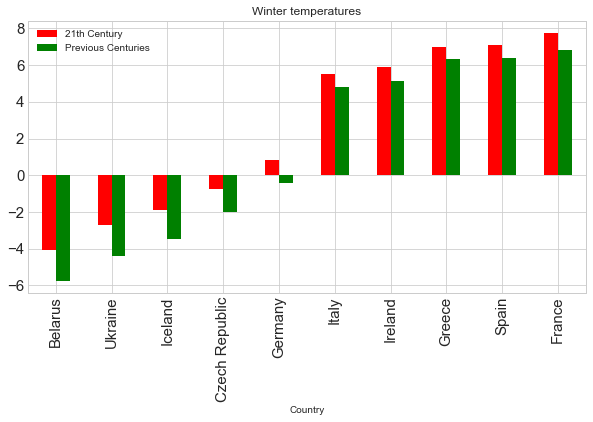

In [17]:
plot = winter_temperatures.plot(
    kind='bar',
    y=['current_century', 'previous_century'],
    color=['red', 'green'],
    title='Winter temperatures',
    figsize=(10, 5),
    fontsize=15
)
plt.legend(['21th Century', 'Previous Centuries']);
plt.show()

#### Summer in European countries:

In [18]:
summer_temperatures = pd.merge(
    current_summer_temperatures[['AverageTemperature']],
    previous_summer_temperatures[['AverageTemperature']],
    on='Country'
)
summer_temperatures = summer_temperatures.rename(index=str, columns={
    'AverageTemperature_x': 'current_century', 'AverageTemperature_y': 'previous_century',
}).sort_values(by=['current_century'])
summer_temperatures

,current_century,previous_century
Country,,
Iceland,8.499310,7.695474
Ireland,14.926357,14.301111
Germany,17.802143,16.671809
Czech Republic,18.224381,16.935403
Belarus,18.331333,17.093837
France,19.958952,18.847450
Ukraine,20.639857,19.248543
Italy,22.530000,20.988617
Spain,22.852762,21.518485


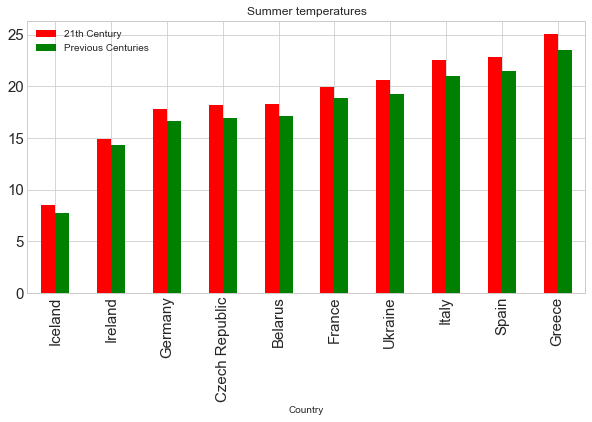

In [19]:
plot = summer_temperatures.plot(
    kind='bar',
    y=['current_century', 'previous_century'],
    color=['red', 'green'],
    title='Summer temperatures',
    figsize=(10, 5),
    fontsize=15
)
plt.legend(['21th Century', 'Previous Centuries']);
plt.show()

As we can see, France is the hottest country in winter season and Greece - in summer.
Germany has negative temperatures in the previous centuries, but positive in 21th in the winter.

### Step 3. Comparing temperature results with Russia

Let's take a coldest country in winter (Belarus) and the hottest country in summer (Greece) and compare with our country - Russia

In [20]:
countries = ['Belarus', 'Greece', 'Russia']
result = source_temperatures[source_temperatures.Country.isin(countries)]
winter_cmp_filter = result['dt'].map(lambda x: x.month in [12, 1, 2])
summer_cmp_filter = result['dt'].map(lambda x: x.month in [6, 7, 8])

winter_russia_cmp = aggregate(result[winter_cmp_filter])
summer_russia_cmp = aggregate(result[summer_cmp_filter])

#### Winter. Comparing with Russia

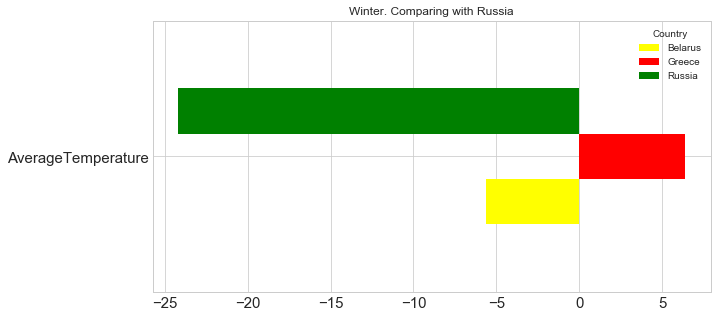

In [21]:
winter_russia_cmp.T.plot(
    kind='barh',
    color=['yellow', 'red', 'green'],
    title='Winter. Comparing with Russia',
    figsize=(10, 5),
    fontsize=15
)

#### Summer. Comparing with Russia

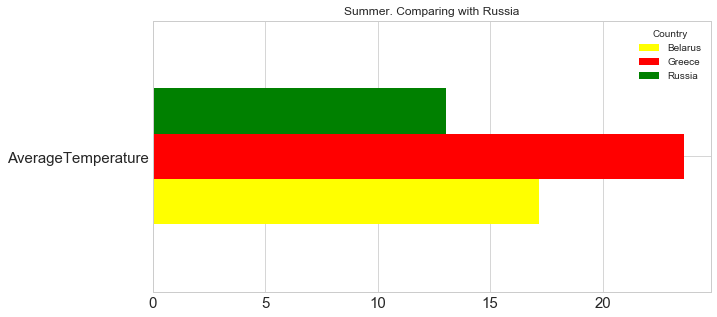

In [22]:
summer_russia_cmp.T.plot(
    kind='barh',
    color=['yellow', 'red', 'green'],
    title='Summer. Comparing with Russia',
    figsize=(10, 5),
    fontsize=15
)

As we see, Greece is the hottest European country in any season, Russia - is the coldest